# 时间序列分析与建模

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel("data\\sp500.xlsx")
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


## 时序的数据预处理

In [3]:
# 日期列转换
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_20412\773972606.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume
0,2000-03-01,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-04-01,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,2000-05-01,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,2000-06-01,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,2000-07-01,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [4]:
# 时间序列的聚合（重采样）：时间粒度规整化
df = df.resample(
            rule='M',   # M:按月聚合; W:按周聚合; D:按天聚合
            on='Date'
            ).mean()    # .sum()
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_20412\1475606237.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31,1422.309509,1436.489002,1410.382513,1424.124005,1.069355e+09
2000-02-29,1391.677782,1403.917779,1379.257209,1391.433892,1.068028e+09
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08


In [5]:
# 应用移动平均滤波：去白噪声
window_size = 2  # 选择一个适当的窗口大小
df['Open_ma'] = df['Open'].rolling(window=window_size).mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Open_ma
Date,,,,,,
2000-02-29,1391.677782,1403.917779,1379.257209,1391.433892,1.068028e+09,1406.993646
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09,1423.958886
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09,1444.730550
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08,1429.548302
2000-06-30,1453.397827,1463.136528,1441.573492,1450.915209,1.046096e+09,1439.636661


Text(0.5, 1.0, 'Open Moving Average')

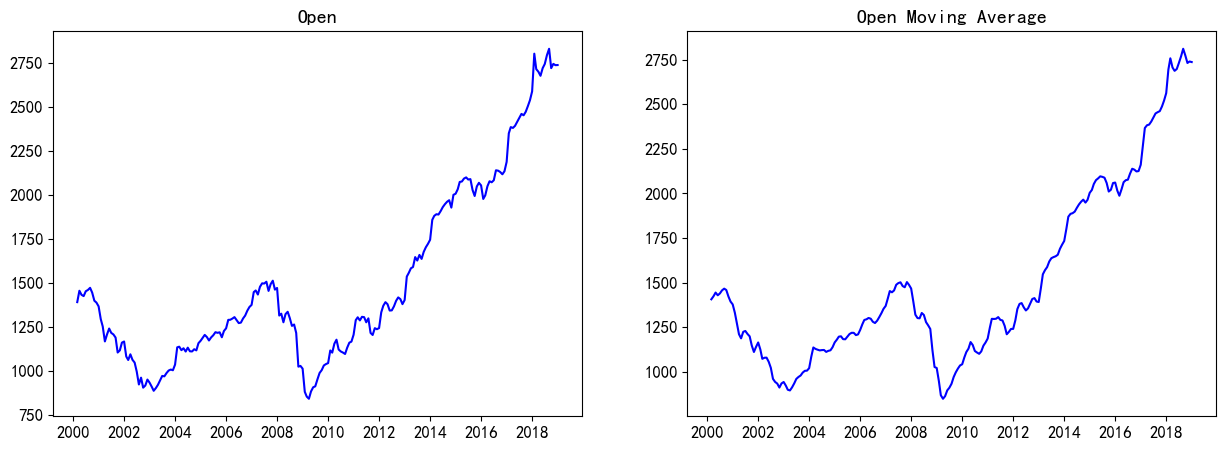

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Open'], label='Original', color='b')
plt.title("Open")

plt.subplot(1, 2, 2)
plt.plot(df['Open_ma'], label='Moving Average', color='b')
plt.title("Open Moving Average")

## 时序的趋势分解

有数学公式记得准备

Text(0.5, 1.0, 'residual')

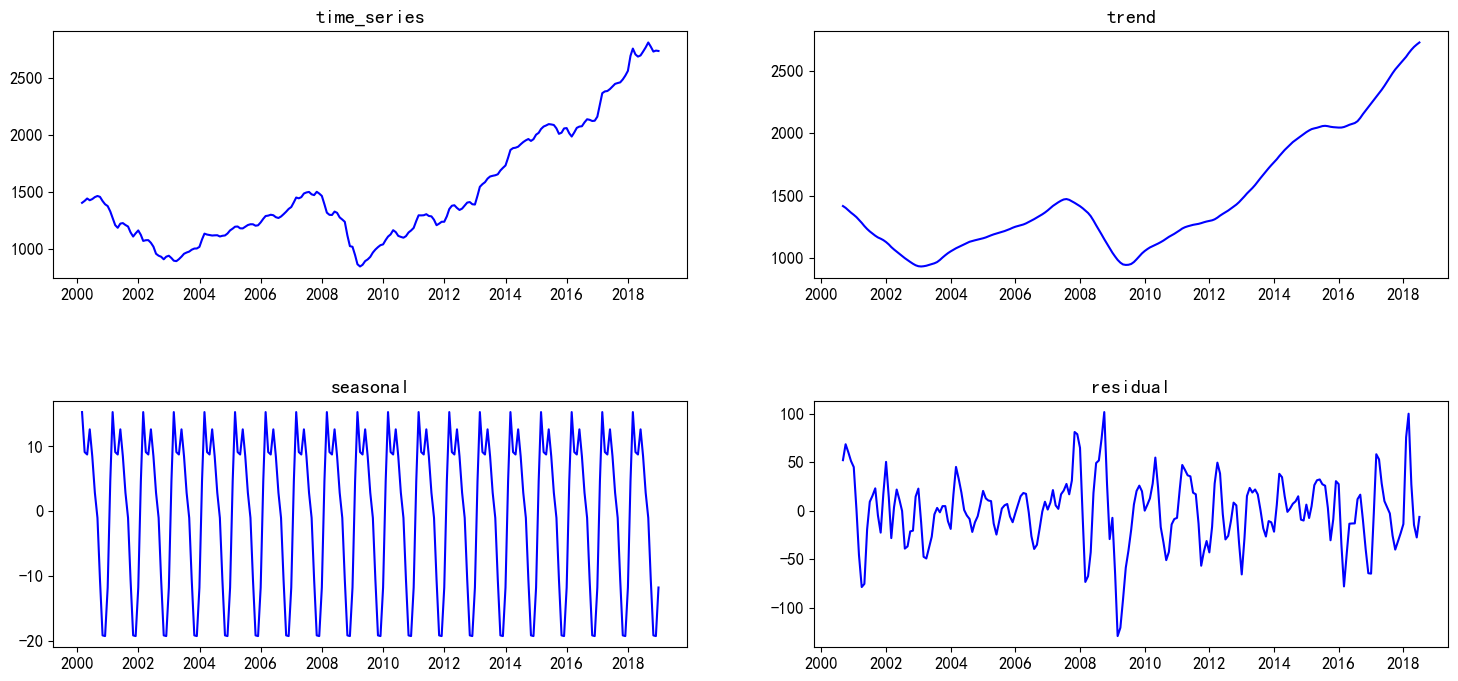

In [7]:
result = sm.tsa.seasonal_decompose(df['Open_ma'])

# 绘制原始数据、趋势、季节性和残差
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)               # 同一列元素AX之间距离

ax[0][0].plot(df['Open_ma'], color='b')
ax[0][0].set_title("time_series")

ax[0][1].plot(result.trend, color='b')
ax[0][1].set_title("trend")

ax[1][0].plot(result.seasonal, color='b')
ax[1][0].set_title("seasonal")

ax[1][1].plot(result.resid, color='b')
ax[1][1].set_title("residual")

## 时序的检验

p值小于0.05才能确定时间序列平稳，否则就需要进行差分，然后再进行检验

In [8]:
from statsmodels.tsa.stattools import adfuller

# ADF检验
result = adfuller(df['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.6756280027337007
p-value: 0.9980676257113726
Critical Values:
   1%, -3.4596204846395824
Critical Values:
   5%, -2.8744153028455948
Critical Values:
   10%, -2.5736320761218576


In [9]:
df['Open'].head()

Date
2000-02-29    1391.677782
2000-03-31    1456.239990
2000-04-30    1433.221110
2000-05-31    1425.875494
2000-06-30    1453.397827
Freq: ME, Name: Open, dtype: float64

In [10]:
# 对数据进行一次差分
df['Open_diff'] = df['Open'].diff()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Open_ma,Open_diff
Date,,,,,,,
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09,1423.958886,64.562208
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09,1444.730550,-23.018880
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08,1429.548302,-7.345616
2000-06-30,1453.397827,1463.136528,1441.573492,1450.915209,1.046096e+09,1439.636661,27.522333
2000-07-31,1460.659121,1471.706957,1450.941746,1461.064336,9.957826e+08,1457.028474,7.261294


In [11]:
from statsmodels.tsa.stattools import adfuller

# ADF检验
result = adfuller(df['Open_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -13.412543576969918
p-value: 4.345147301101232e-25
Critical Values:
   1%, -3.4597521044060353
Critical Values:
   5%, -2.874472927517147
Critical Values:
   10%, -2.5736628197530864


Text(0.5, 1.0, 'Open_diff')

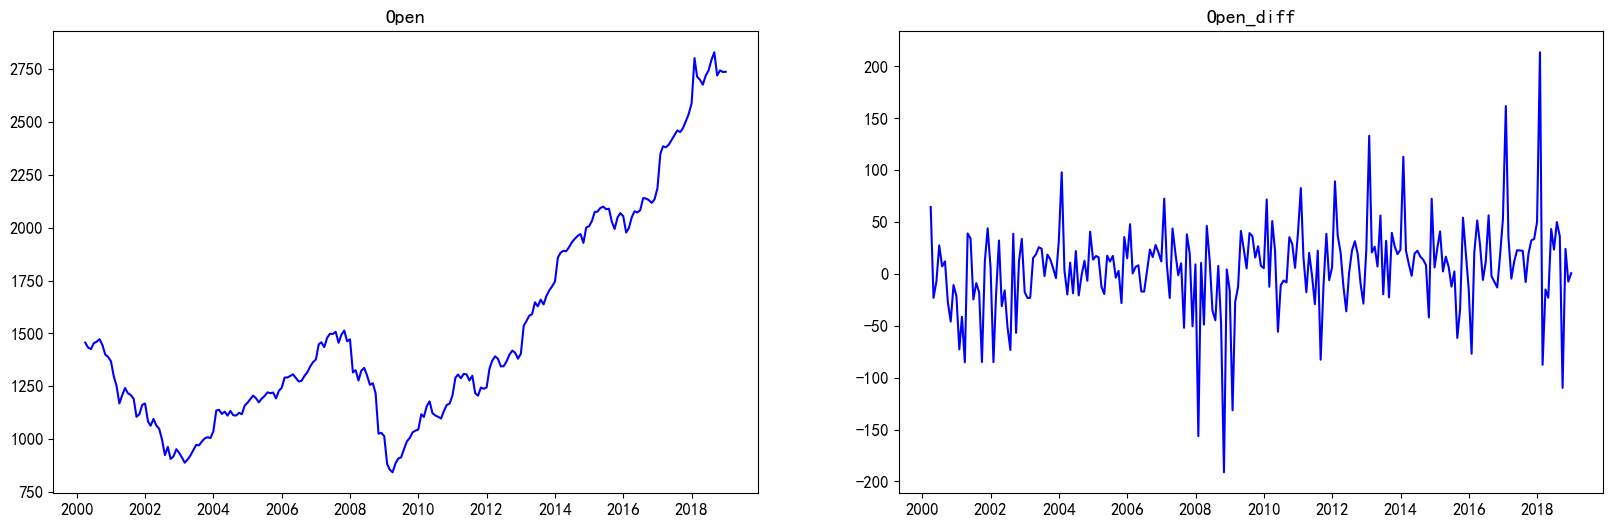

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Open'], color='b')
plt.title('Open')
plt.subplot(1, 2, 2)
plt.plot(df['Open_diff'], color='b')
plt.title('Open_diff')

## 时序的时域分析与频域分析

时间序列分析主要两大部分：
- 趋势性分解
- 时域分析（均值、方差、极值等统计量）、频域分析（傅里叶变换）

In [13]:
# 这里假设 df 已经是你的 DataFrame，并且 'open' 是时间序列数据列
ts = df['Open_diff']

# 拆分训练集和测试集（例如，最后20个数据点作为测试集）
train = ts[:-20]
test = ts[-20:]

### 时域分析

In [14]:
print("Mean:", ts.mean())
print("Standard Deviation:", ts.std())
print("Min:", ts.min())
print("Max:", ts.max())

Mean: 5.951307779252703
Standard Deviation: 43.374825540229544
Min: -191.20257864999985
Max: 213.7037273205883


### 频域分析：有数学公式记得准备

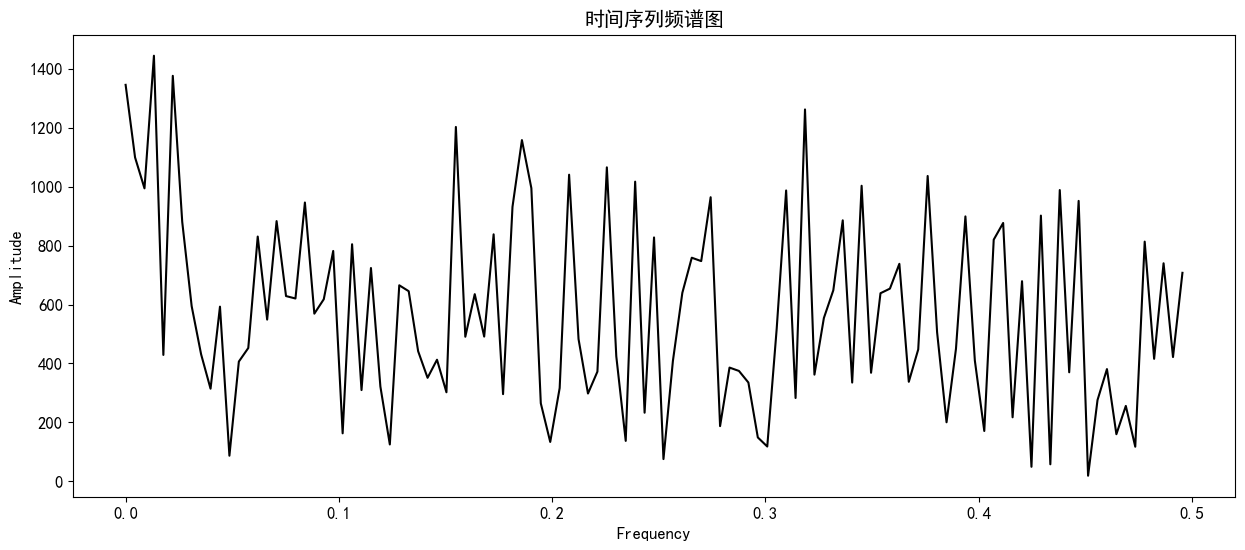

In [15]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# 执行傅里叶变换
fft_values = fft(ts.values)
fft_frequencies = fftfreq(len(ts), d=1)  # d=1 表示采样间隔为1天

# 只取前一半的频率，因为FFT结果是对称的
half_n = len(ts) // 2
fft_values = fft_values[:half_n]
fft_frequencies = fft_frequencies[:half_n]

# 绘制频谱图
plt.figure(figsize=(15, 6))
plt.plot(fft_frequencies, np.abs(fft_values), color='black')
plt.title('时间序列频谱图')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 一元时间序列预测

时间序列预测中的解释性强的模型通常指那些能够提供明确的预测依据和解释的模型。以下是一些具有较强解释性的时间序列预测模型：


In [16]:
import pandas as pd # 数据操作库
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）

# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False


1. **ARIMA（自回归积分滑动平均模型）**：
   - **解释性**：ARIMA模型通过自回归（AR）、差分（I）和移动平均（MA）三个部分来捕捉时间序列的特征。参数的选择和模型的拟合过程可以清楚地解释时间序列的结构和趋势。
   - **例子**：对于季度销售数据，ARIMA模型可以解释过去几季的销售数据对当前销售的影响。


In [17]:
# 1. ARIMA 模型

# order的三个元素中，中间元素是差分数量
# 第三步 steps 表示预测的步长，也就是往train后面预测多少月（周、天）的数据
model_arima = sm.tsa.ARIMA(train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=20)

# 从原始数据的最后一个值开始还原
last_original_value = df['Open'].iloc[-1]

# 还原差分后的预测值
forecasted_values = forecast_arima.cumsum() + last_original_value
forecasted_values

2017-05-31    2753.197699
2017-06-30    2770.277510
2017-07-31    2787.421575
2017-08-31    2804.573072
2017-09-30    2821.725428
2017-10-31    2838.877885
2017-11-30    2856.030353
2017-12-31    2873.182822
2018-01-31    2890.335291
2018-02-28    2907.487760
2018-03-31    2924.640230
2018-04-30    2941.792699
2018-05-31    2958.945168
2018-06-30    2976.097637
2018-07-31    2993.250107
2018-08-31    3010.402576
2018-09-30    3027.555045
2018-10-31    3044.707515
2018-11-30    3061.859984
2018-12-31    3079.012453
Freq: ME, Name: predicted_mean, dtype: float64

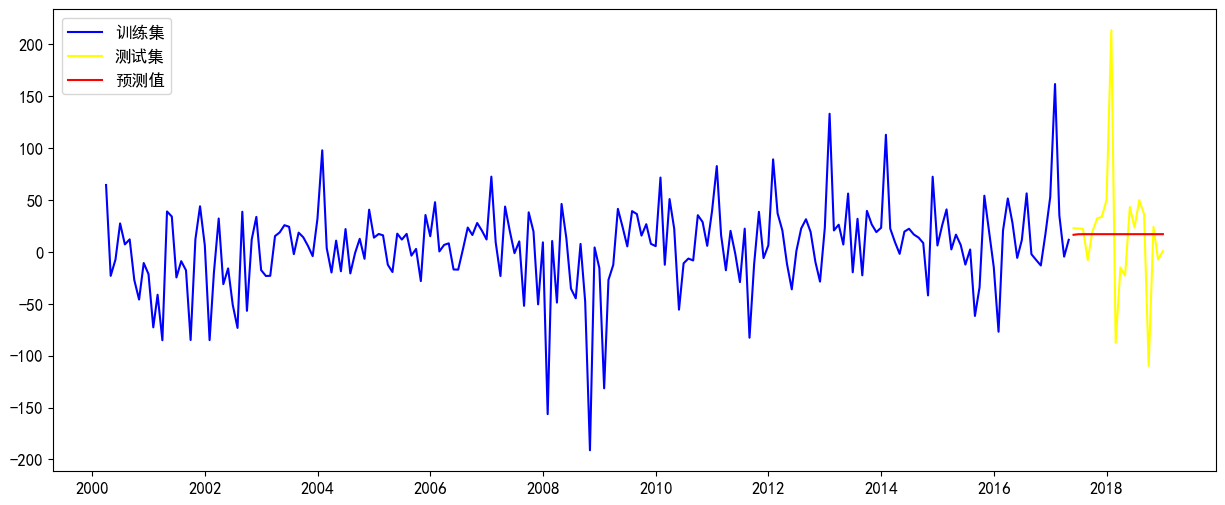

In [18]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_arima, label='预测值', color='red')
plt.legend()
plt.show()

In [19]:
# 打印模型摘要以获取详细信息
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Open_diff   No. Observations:                  206
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1050.890
Date:                Thu, 08 Aug 2024   AIC                           2107.780
Time:                        08:42:42   BIC                           2117.749
Sample:                    03-31-2000   HQIC                          2111.812
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1157      0.095      1.216      0.224      -0.071       0.302
ma.L1         -0.9600      0.027    -36.131      0.000      -1.012      -0.908
sigma2      1641.5701    110.472     14.860      0.0


2. **SARIMA（季节性自回归积分滑动平均模型）**：
   - **解释性**：SARIMA模型在ARIMA的基础上增加了季节性成分，能够更好地捕捉具有季节性波动的时间序列数据。
   - **例子**：对于每月的电力消耗数据，SARIMA模型可以解释每年的季节性变化以及其他非季节性因素对电力消耗的影响。


In [20]:
# 2. SARIMA 模型
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
forecast_sarima = model_sarima_fit.forecast(steps=20)

# 从原始数据的最后一个值开始还原
last_original_value = df['Open'].iloc[-1]

# 还原差分后的预测值
forecasted_values = forecast_sarima.cumsum() + last_original_value
print(forecasted_values)

2017-05-31    2750.314322
2017-06-30    2759.824883
2017-07-31    2783.515904
2017-08-31    2790.627043
2017-09-30    2800.246263
2017-10-31    2808.469343
2017-11-30    2834.947848
2017-12-31    2862.175224
2018-01-31    2912.599821
2018-02-28    2937.033738
2018-03-31    2954.513381
2018-04-30    2980.686080
2018-05-31    2998.900713
2018-06-30    3010.023997
2018-07-31    3033.047678
2018-08-31    3042.337985
2018-09-30    3054.676945
2018-10-31    3065.894289
2018-11-30    3094.528360
2018-12-31    3121.537868
Freq: ME, Name: predicted_mean, dtype: float64


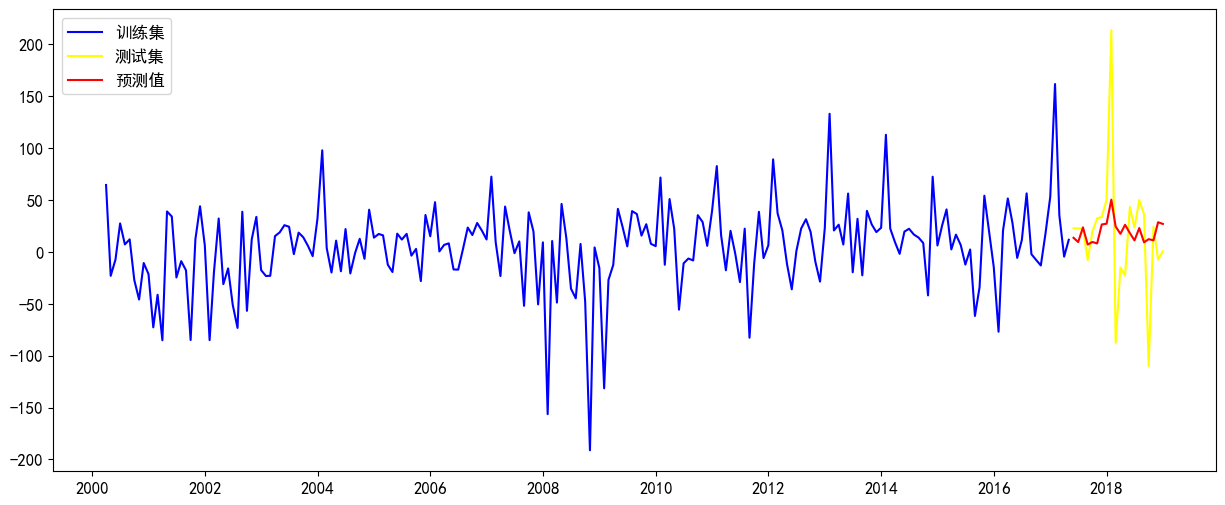

In [21]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_sarima, label='预测值', color='red')
plt.legend()
plt.show()

In [22]:
# 打印模型摘要以获取详细信息
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Open_diff   No. Observations:                  206
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1008.341
Date:                            Thu, 08 Aug 2024   AIC                           2026.681
Time:                                    08:42:43   BIC                           2042.994
Sample:                                03-31-2000   HQIC                          2033.287
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1217      0.105      1.154      0.248      -0.085       0.328
ma.L1         -0.9956      0.185   


3. **指数平滑模型（Exponential Smoothing Models）**：
   - **解释性**：指数平滑模型（如Holt-Winters模型）通过对过去数据加权平均来预测未来值，权重逐渐递减，使得最近的数据对预测影响更大。模型中的参数可以解释趋势和季节性成分。
   - **例子**：对于一个公司的月度收入数据，Holt-Winters模型可以解释收入的长期趋势和季节性波动。


In [23]:
# 3. Holt-Winters 模型
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_hw = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_hw_fit = model_hw.fit()
forecast_hw = model_hw_fit.forecast(steps=20)

# 从原始数据的最后一个值开始还原
last_original_value = df['Open'].iloc[-1]

# 还原差分后的预测值
forecasted_values = forecast_hw.cumsum() + last_original_value
print(forecasted_values)

2017-05-31    2753.044555
2017-06-30    2762.420634
2017-07-31    2787.151520
2017-08-31    2791.964544
2017-09-30    2804.542636
2017-10-31    2816.039600
2017-11-30    2844.015822
2017-12-31    2870.805927
2018-01-31    2919.793958
2018-02-28    2944.427488
2018-03-31    2962.438306
2018-04-30    2988.641148
2018-05-31    3005.012364
2018-06-30    3014.388442
2018-07-31    3039.119329
2018-08-31    3043.932352
2018-09-30    3056.510444
2018-10-31    3068.007408
2018-11-30    3095.983630
2018-12-31    3122.773735
Freq: ME, dtype: float64


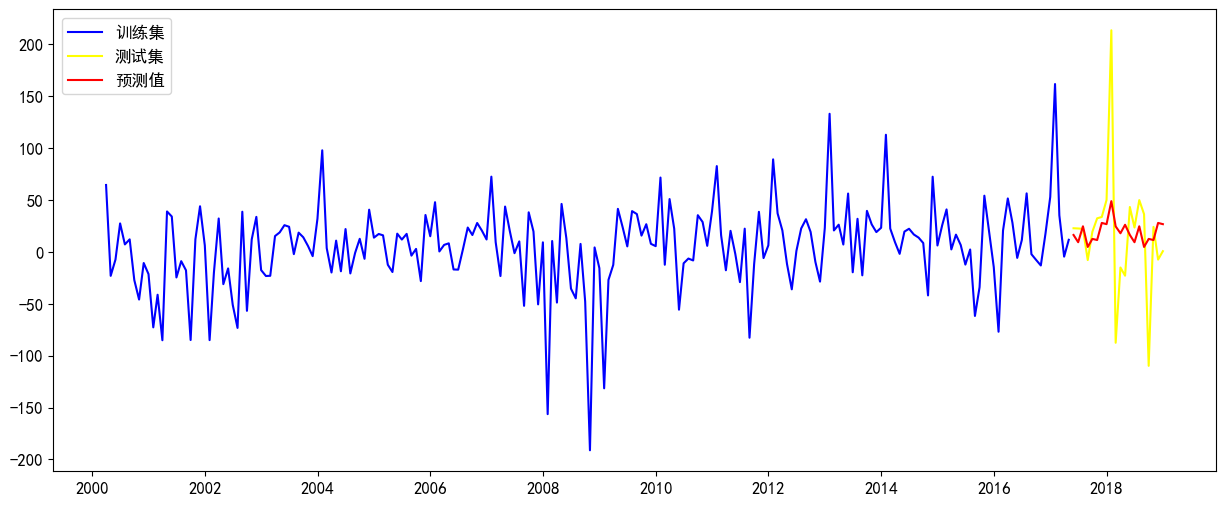

In [ ]:
# 绘制结果
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='训练集', color='blue')
plt.plot(test.index, test, label='测试集', color='yellow')
plt.plot(test.index, forecast_hw, label='预测值', color='red')
plt.legend()
plt.show()

In [ ]:
# 打印模型摘要以获取详细信息
print(model_hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Open_diff   No. Observations:                  206
Model:             ExponentialSmoothing   SSE                         351122.398
Optimized:                         True   AIC                           1560.849
Trend:                             None   BIC                           1607.439
Seasonal:                      Additive   AICC                          1563.727
Seasonal Periods:                    12   Date:                 Wed, 07 Aug 2024
Box-Cox:                          False   Time:                         16:00:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0766336                alpha                 True
smoothing_seasonal       

## 多元时间序列预测

多元时间序列预测中的解释性强的模型通常指那些能够提供明确的预测依据和解释的模型。以下是一些具有较强解释性的多元时间序列预测模型：
1. **VAR（向量自回归模型）**：
   - **解释性**：VAR模型假设时间序列的当前值是过去所有值的一个线性组合，并且不同时间序列之间的相关性是动态的。
   - **例子**：对于多个经济指标（如GDP、失业率、通货膨胀率等），VAR模型可以解释这些指标之间的相互影响和动态关系。


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR


# 生成示例多变量时间序列数据
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.random.randn(100, 4).cumsum(axis=0)
df = pd.DataFrame(data, index=dates, columns=['Variable1', 'Variable2', 'Variable3', 'Variable4'])
df.head()

,Variable1,Variable2,Variable3,Variable4
2020-01-01,1.764052,0.400157,0.978738,2.240893
2020-01-02,3.631610,-0.577121,1.928826,2.089536
2020-01-03,3.528391,-0.166522,2.072870,3.543809
2020-01-04,4.289429,-0.044847,2.516733,3.877484
2020-01-05,5.783508,-0.250005,2.829801,3.023388


In [ ]:
# 拆分训练集和测试集
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

print(train.shape, test.shape)

(80, 4) (20, 4)


In [ ]:
# 拟合VAR模型
model = VAR(train)
fitted_model = model.fit(maxlags=15, ic='aic')

# 进行预测
forecast = fitted_model.forecast(train.values[-fitted_model.k_ar:], steps=len(test))
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

print(forecast_df.head())

            Variable1  Variable2  Variable3  Variable4
2020-03-21   0.791886  -3.779512 -11.208062  15.277256
2020-03-22   3.421992  -5.466975  -7.610087  10.830568
2020-03-23   7.788692  -7.110745  -4.404353  11.992250
2020-03-24   6.296296 -10.917044  -5.003953  16.275178
2020-03-25   3.908092 -15.013953  -2.999014  17.554241


In [ ]:
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Aug, 2024
Time:                     16:00:33
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -1.97850
Nobs:                     65.0000    HQIC:                  -6.92026
Log likelihood:           204.653    FPE:                  0.0213104
AIC:                     -10.1408    Det(Omega_mle):      0.00150926
--------------------------------------------------------------------
Results for equation Variable1
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 5.474528         5.764208            0.950           0.342
L1.Variable1          0.708931         0.381322            1.859           0.063
L1.Variable2          0.415293         0.395955         

In [ ]:
# 评估模型
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_var1 = mean_absolute_percentage_error(test['Variable1'], forecast_df['Variable1'])
mape_var2 = mean_absolute_percentage_error(test['Variable2'], forecast_df['Variable2'])
mape_var3 = mean_absolute_percentage_error(test['Variable3'], forecast_df['Variable3'])
mape_var4 = mean_absolute_percentage_error(test['Variable4'], forecast_df['Variable4'])

print(f'MAPE for Variable1: {mape_var1:.2f}%')
print(f'MAPE for Variable2: {mape_var2:.2f}%')
print(f'MAPE for Variable3: {mape_var3:.2f}%')
print(f'MAPE for Variable4: {mape_var4:.2f}%')

MAPE for Variable1: 2474.59%
MAPE for Variable2: 153.48%
MAPE for Variable3: 60.21%
MAPE for Variable4: 29.62%


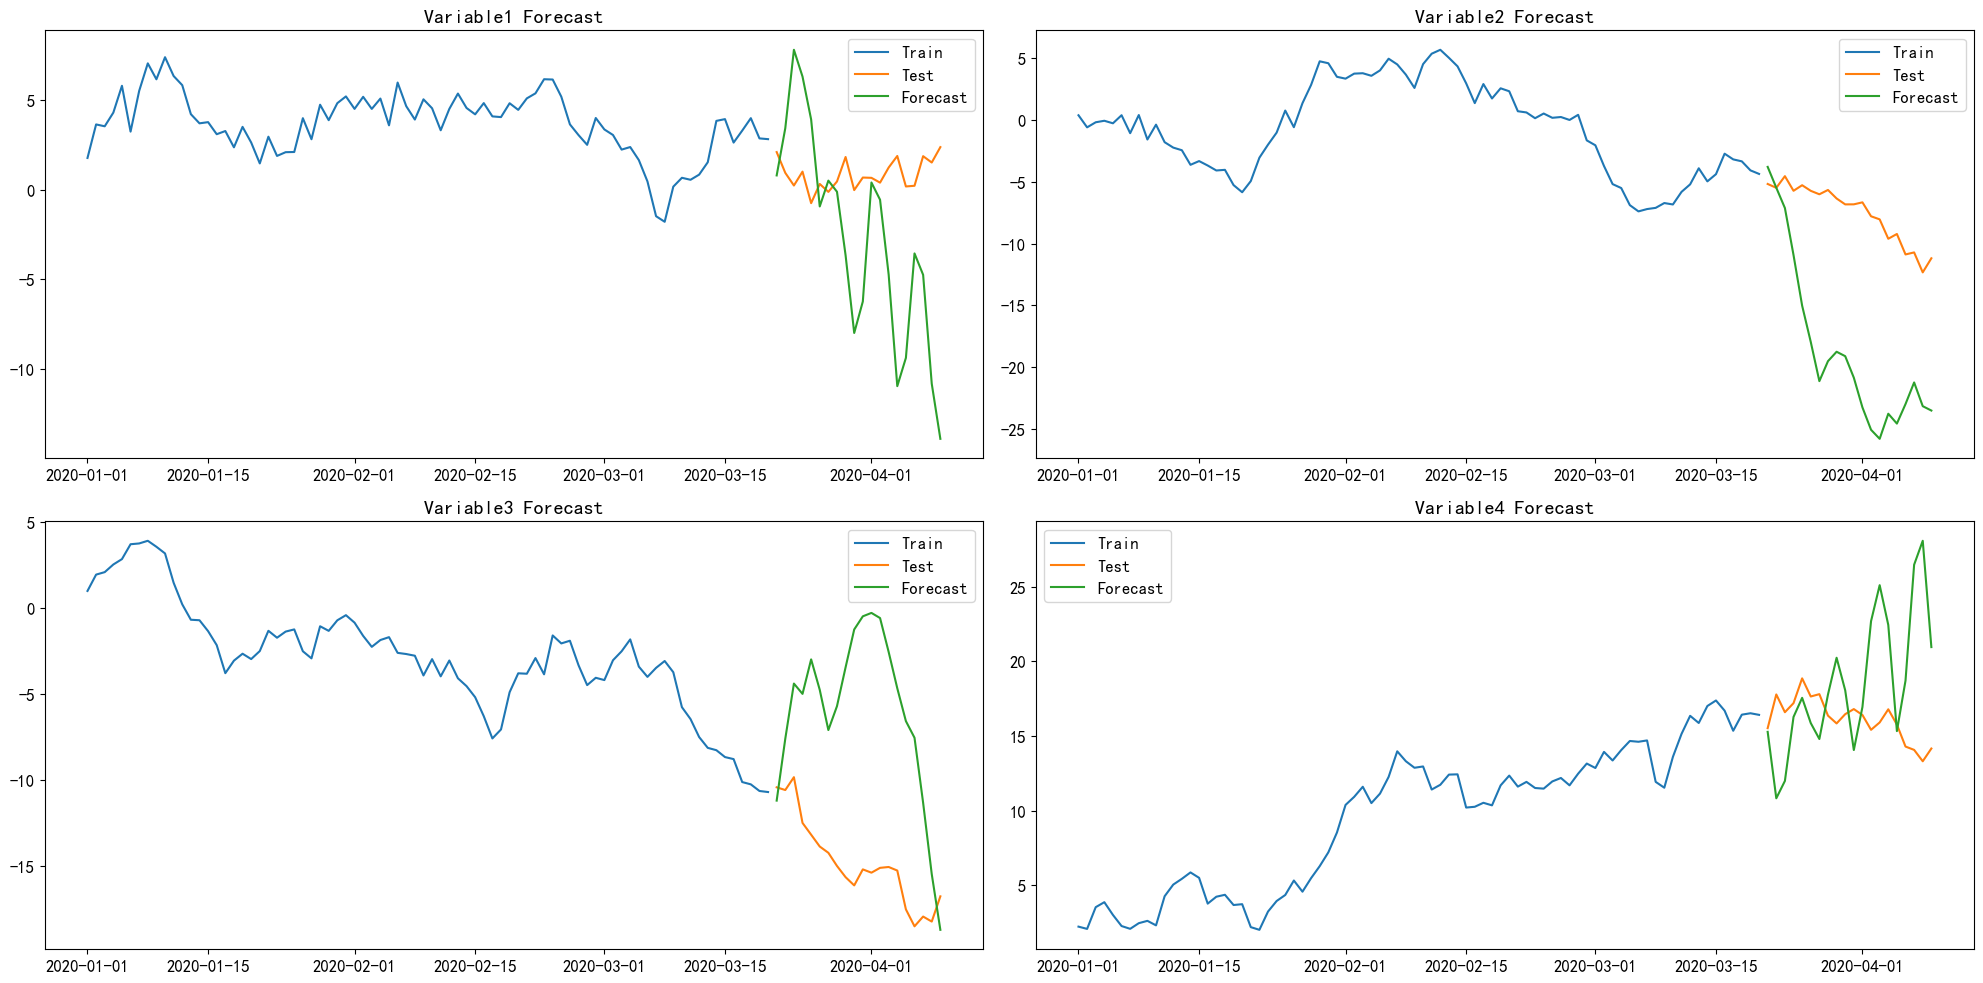

In [ ]:
# 绘制预测结果
plt.figure(figsize=(20, 10))


plt.subplot(221)
plt.plot(train['Variable1'], label='Train')
plt.plot(test['Variable1'], label='Test')
plt.plot(forecast_df['Variable1'], label='Forecast')
plt.title('Variable1 Forecast')
plt.legend()

plt.subplot(222)
plt.plot(train['Variable2'], label='Train')
plt.plot(test['Variable2'], label='Test')
plt.plot(forecast_df['Variable2'], label='Forecast')
plt.title('Variable2 Forecast')
plt.legend()

plt.subplot(223)
plt.plot(train['Variable3'], label='Train')
plt.plot(test['Variable3'], label='Test')
plt.plot(forecast_df['Variable3'], label='Forecast')
plt.title('Variable3 Forecast')
plt.legend()

plt.subplot(224)
plt.plot(train['Variable4'], label='Train')
plt.plot(test['Variable4'], label='Test')
plt.plot(forecast_df['Variable4'], label='Forecast')
plt.title('Variable4 Forecast')
plt.legend()

plt.tight_layout()
plt.show()
